In [1]:
import tensorflow as tf
from keras.saving import register_keras_serializable

@register_keras_serializable()   
class EfficientnetPreprocess(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EfficientnetPreprocess, self).__init__(**kwargs)
    def call(self, inputs):
        return tf.keras.applications.efficientnet.preprocess_input(inputs)

# Chargement du model
model = tf.keras.models.load_model('../../reports/benchmark_images_models_results/EfficientNetB0_model_best.keras')

2025-05-18 16:20:15.164840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747578015.334670    2349 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747578015.382418    2349 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747578015.759608    2349 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747578015.759638    2349 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747578015.759641    2349 computation_placer.cc:177] computation placer alr

In [9]:
import os
import numpy as np
import shap
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

# Paramètres
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced" 
target_class = '2583'  # Nom de la classe que tu veux extraire
class_names = [target_class]
img_dir = os.path.join(dir_name, target_class)
img_size = (224, 224) # Taille cible

# Obtenir les 4 premiers fichiers image
img_files = sorted(os.listdir(img_dir))[:4]


def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # Ajout d'une dimension de batch
    x = preprocess_input(x)
    return x, img
    
# Charger et redimensionner les images
images = []
for file in img_files:
    img_path = os.path.join(img_dir, file)
    img_array, orig = load_image(img_path)
    images.append(img_array)

# Convertir en numpy array final
images = np.stack(images)

# Initialiser le masker SHAP
masker = shap.maskers.Image("inpaint_telea", images[0].shape)

# Créer l'explainer SHAP
explainer = shap.Explainer(model, masker, output_names=class_names)

# Calculer les valeurs SHAP pour les images qu'on veut expliquer 
shap_values = explainer(images, max_evals=500, outputs=shap.Explanation.argsort.flip[:4])

shap.image_plot(shap_values)

error: OpenCV(4.11.0) /io/opencv/modules/photo/src/inpaint.cpp:713: error: (-210:Unsupported format or combination of formats) The mask must be 8-bit 1-channel image in function 'icvInpaint'


In [13]:
# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
dir2_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced"
img_size = (224, 224)  # Taille cible
batch_size = 32
class_names = sorted(os.listdir(dir2_name))
nb_class = len(class_names)

val_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    seed=42
)



Found 6851 files belonging to 3 classes.


2025-05-18 16:46:40.905303: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  25%|███████████████████████████▌                                                                                  | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  75%|████████████████████████████████████████████████████████████████████████████▌                         | 3/4 [00:48<00:11, 11.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:11<00:00, 16.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [01:35, 23.85s/it]                                                                                                                   


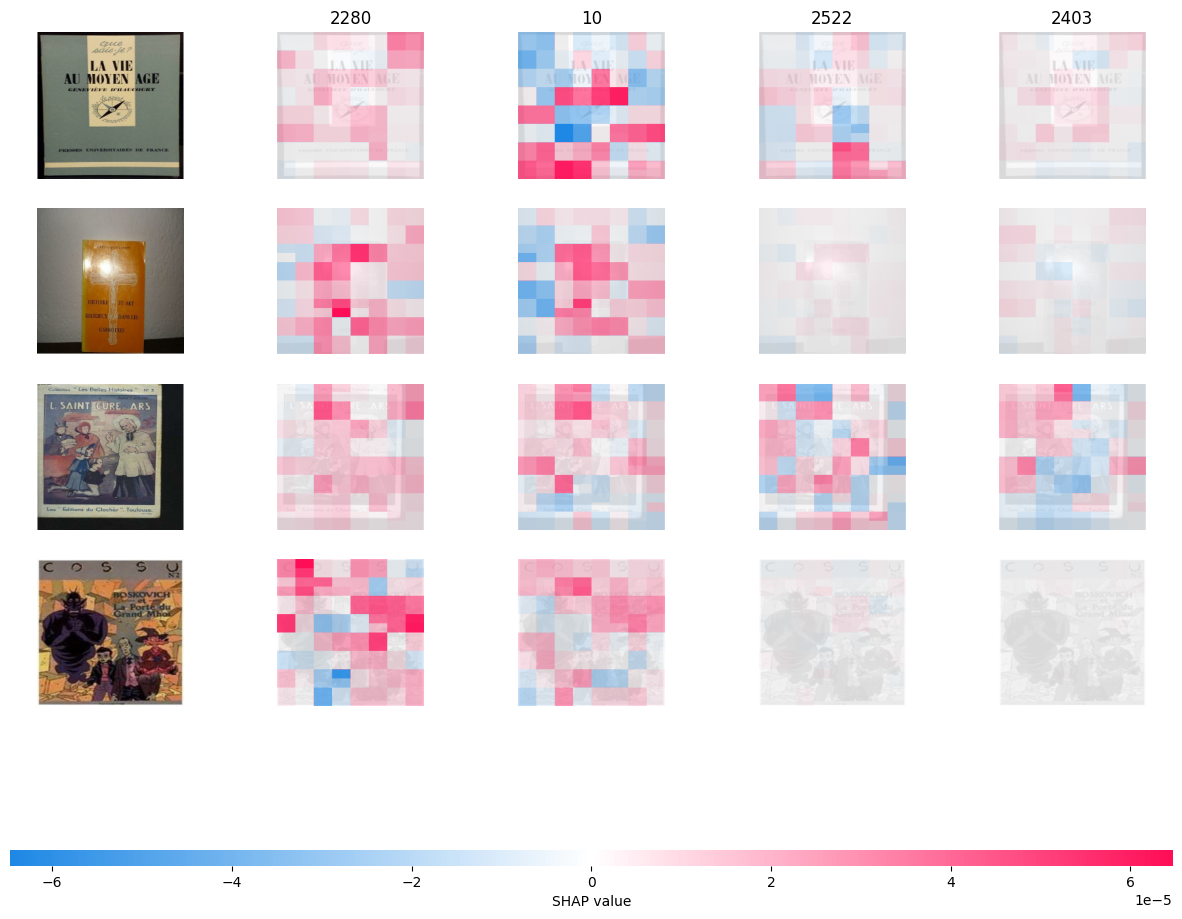

In [14]:
X = np.array([img.numpy() for img, _ in val_ds.take(2)][0]).astype(np.uint8)
y = np.array([label.numpy() for _, label in val_ds.take(2)][0])

# Sélection des images spécifiques
images = X[:4]
labels = y[:4]

# Initialiser le masker SHAP
masker = shap.maskers.Image("inpaint_telea", images[0].shape)

# Créer l'explainer SHAP
explainer = shap.Explainer(model, masker, output_names=class_names)

# Calculer les valeurs SHAP pour les images qu'on veut expliquer 
shap_values = explainer(images, max_evals=500, outputs=shap.Explanation.argsort.flip[:4])

shap.image_plot(shap_values)